--- Demonstrating Signal Operations ---


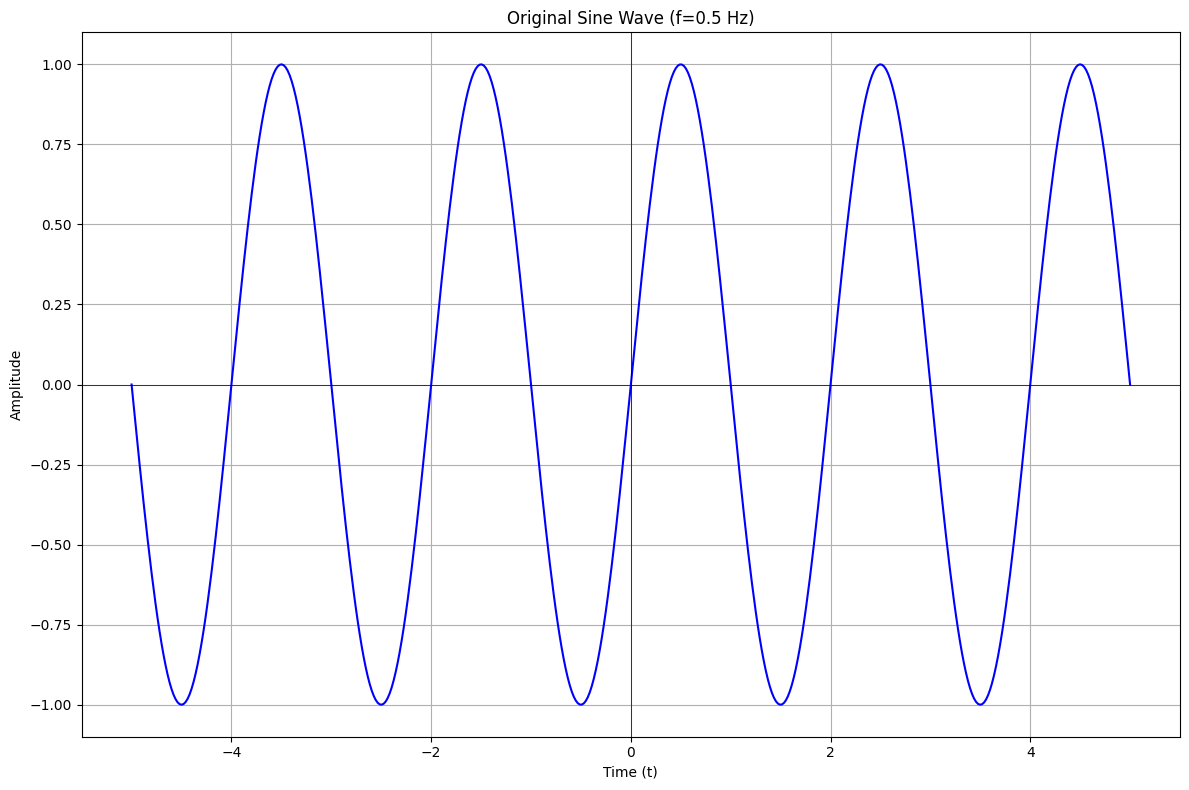

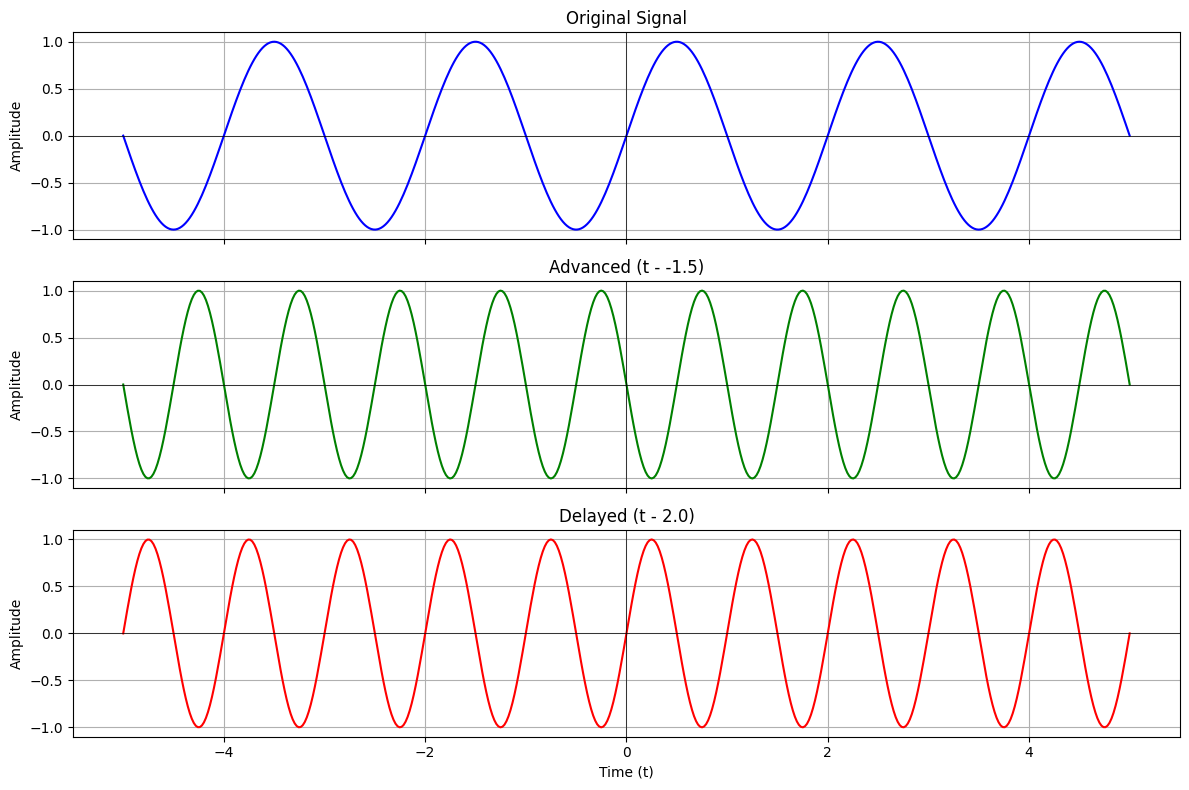

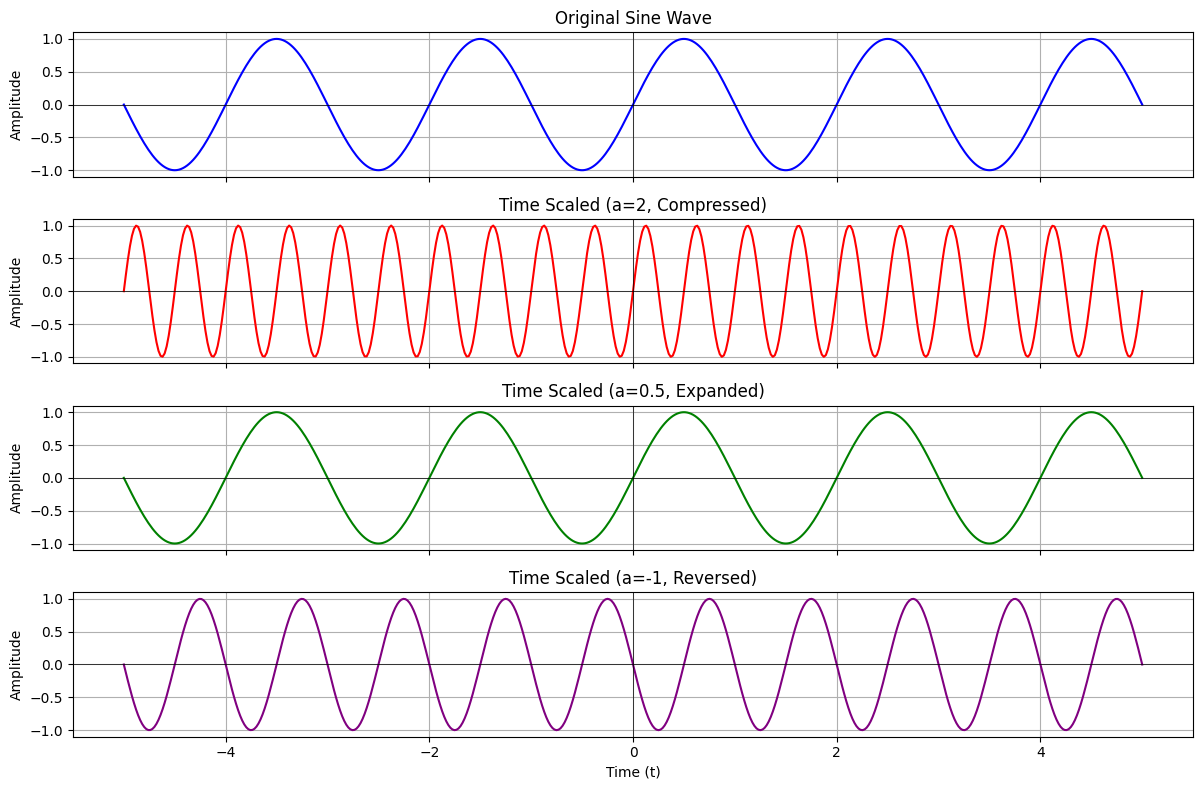

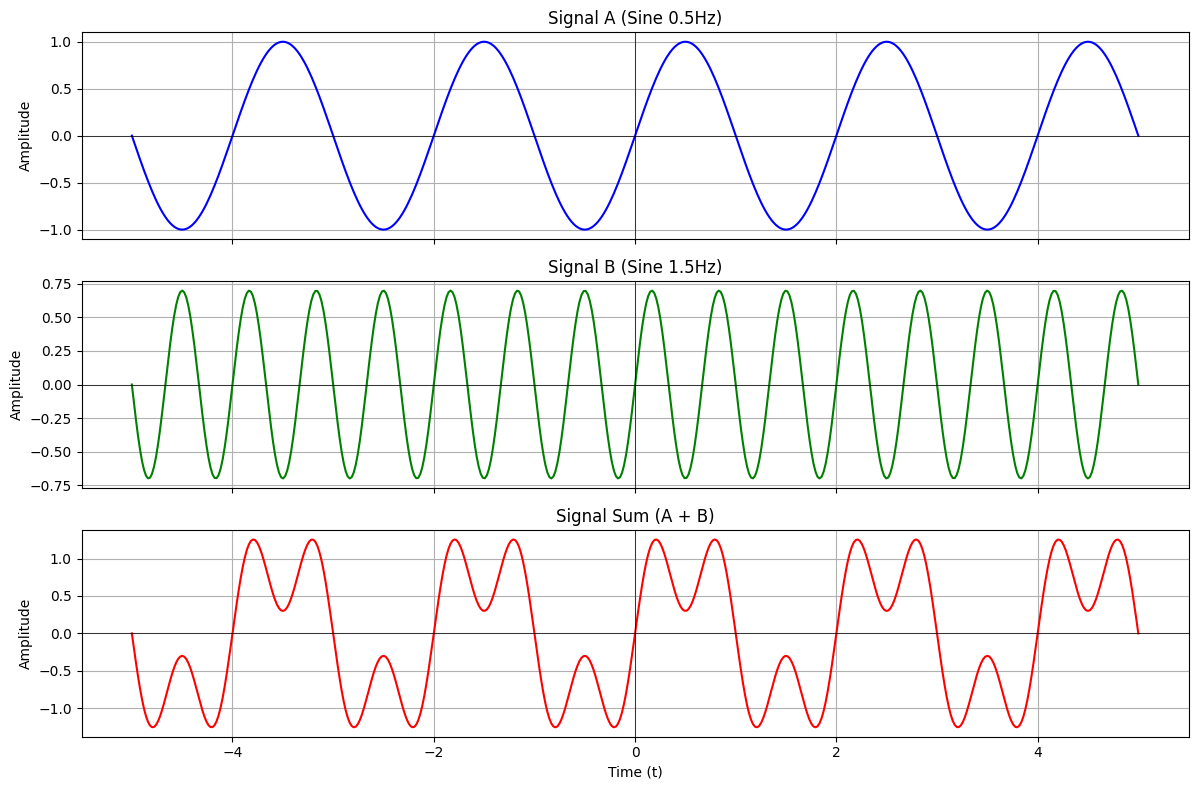

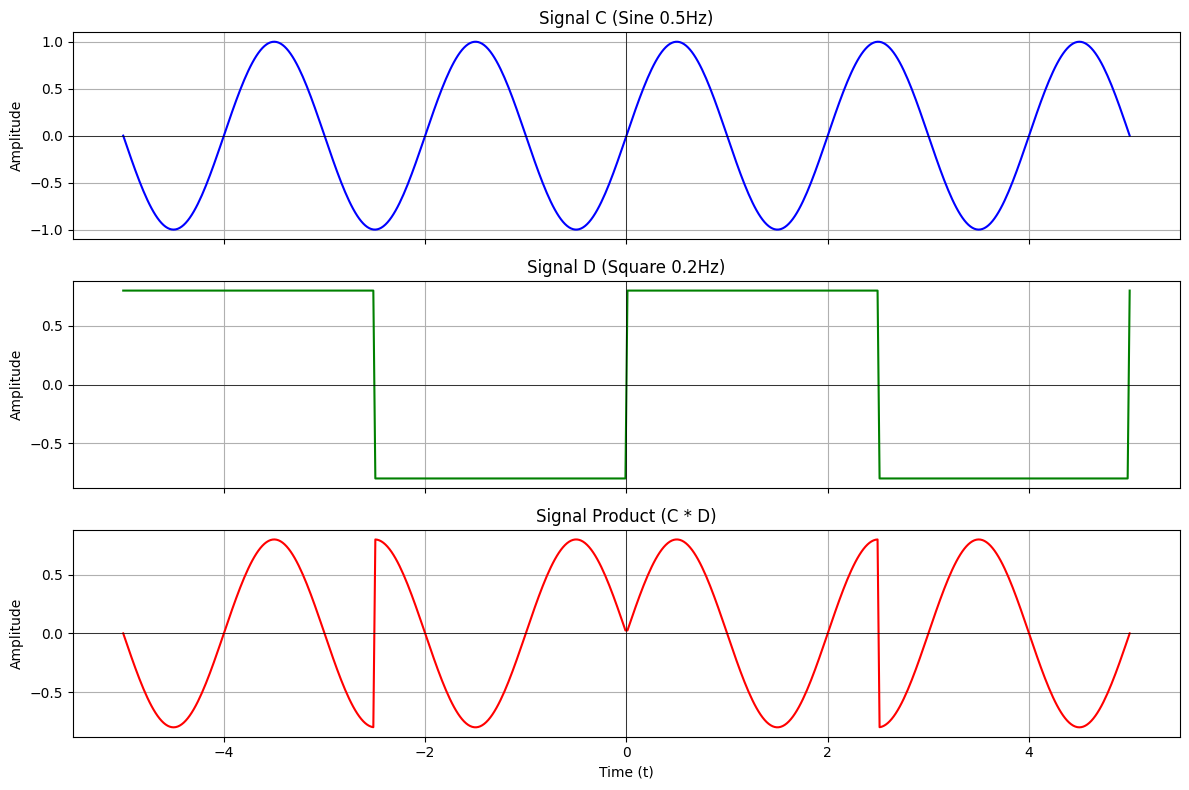

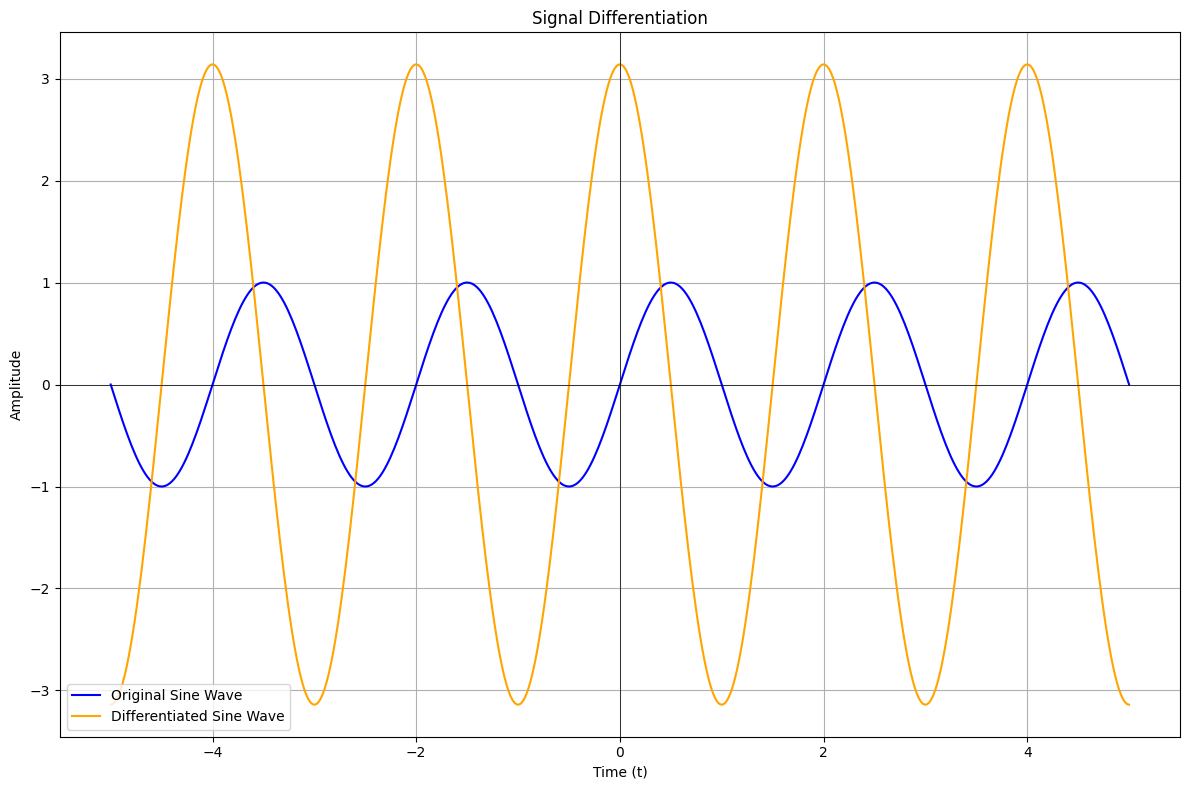

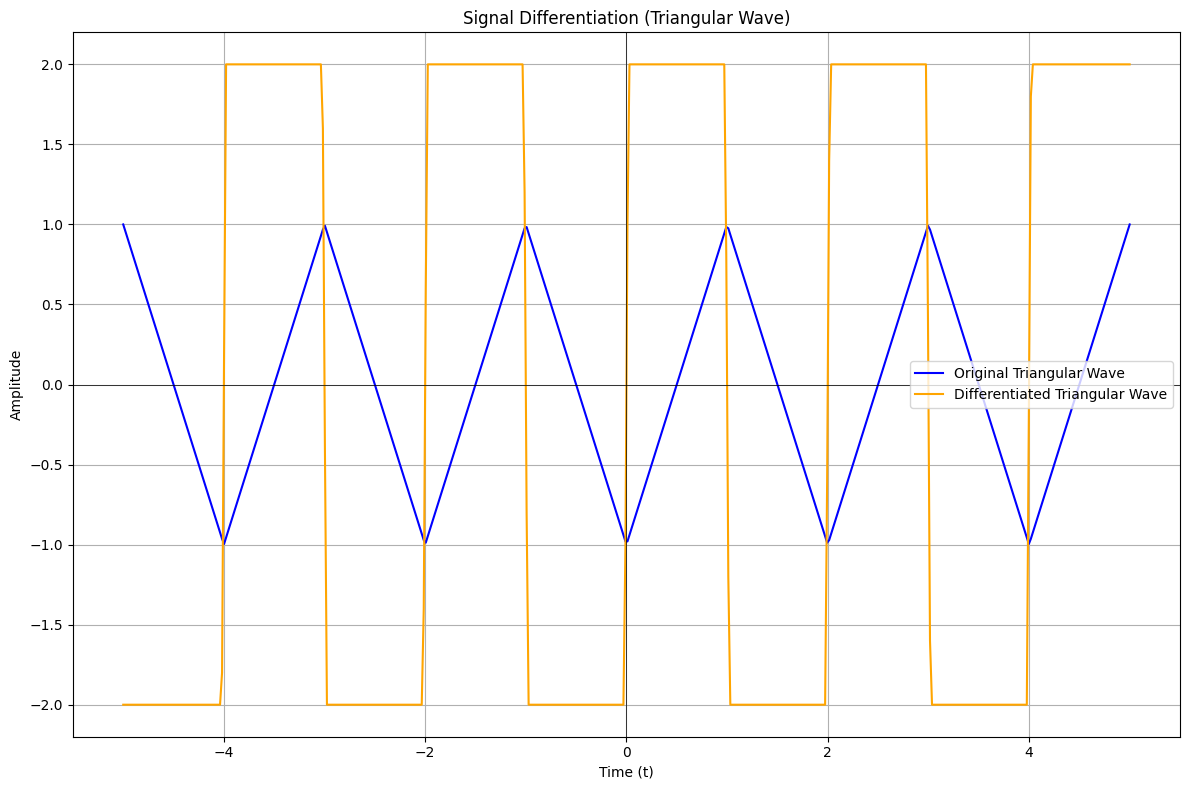

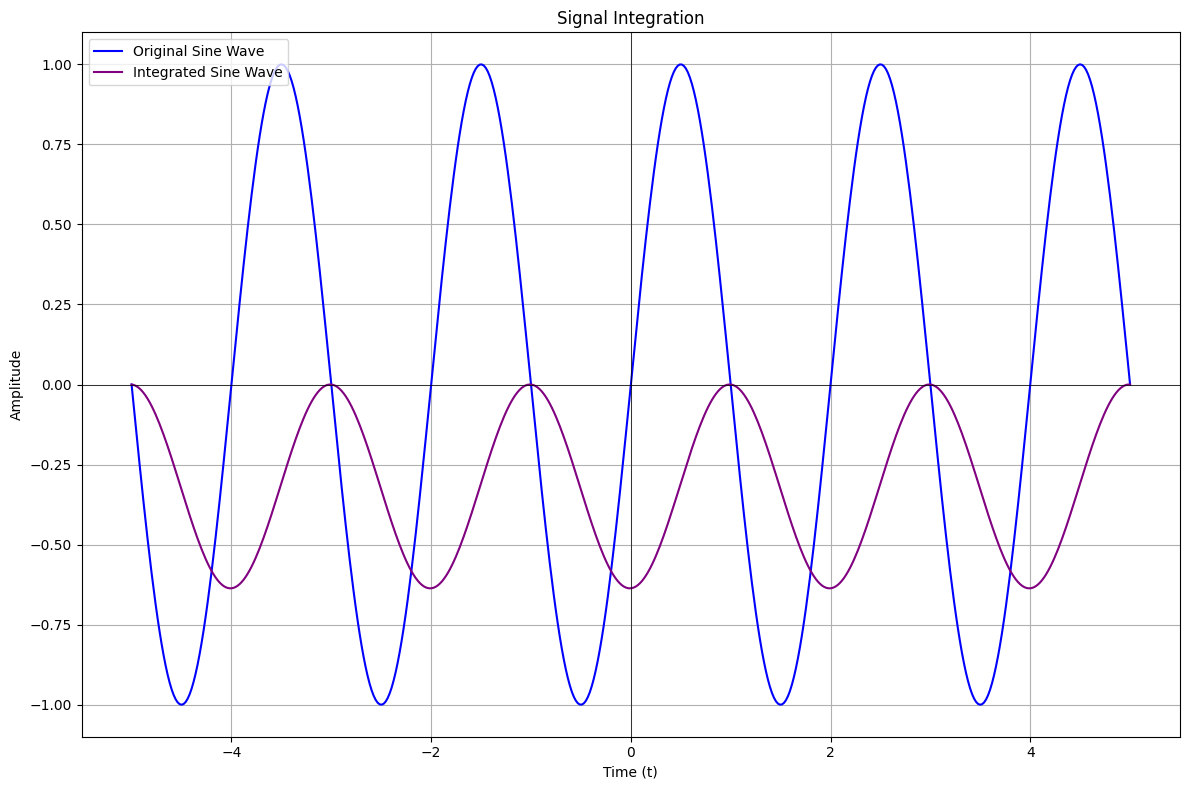

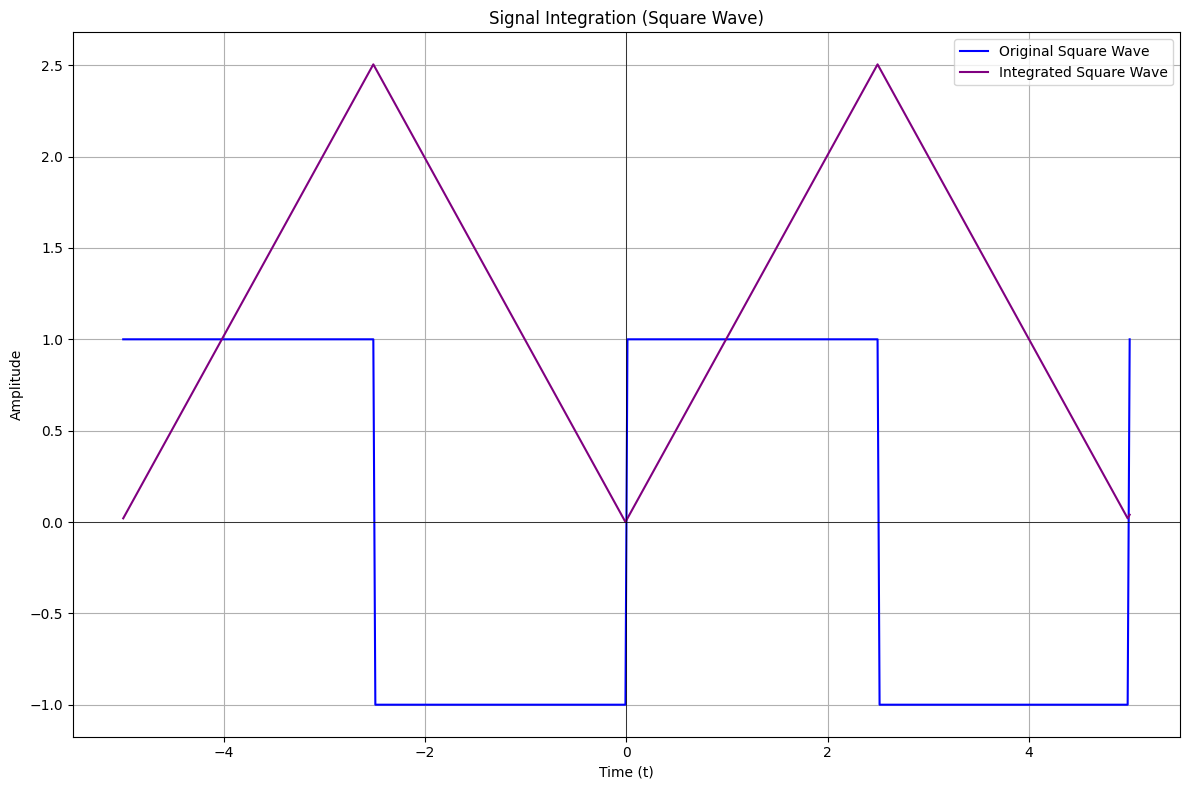

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Base Signals ---

def create_sine_wave(t, frequency=1, amplitude=1, phase=0):
    """Generates a sine wave."""
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def create_square_wave(t, frequency=1, amplitude=1, duty_cycle=0.5):
    """Generates a square wave."""
    # Ensure the square wave is centered around 0 for better visualization of shifts
    return amplitude * (2 * (np.mod(t * frequency, 1) < duty_cycle).astype(float) - 1)

def create_triangular_wave(t, frequency=1, amplitude=1):
    """Generates a triangular wave."""
    return amplitude * (2 * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5))) - 1)

# --- 2. Signal Operations ---

def time_shift(signal_func, t_original, t0):
    """
    Applies a time shift to a signal.
    f_shifted(t) = f(t - t0)
    
    Args:
        signal_func (callable): The original signal function (e.g., create_sine_wave).
        t_original (np.array): The original time array.
        t0 (float): The amount of time to shift.
                    Positive t0 shifts the signal to the right (delay).
                    Negative t0 shifts the signal to the left (advance).
    
    Returns:
        np.array: The time-shifted signal.
    """
    return signal_func(t_original - t0)

def time_scale(signal_func, t_original, a):
    """
    Applies a time scaling to a signal.
    f_scaled(t) = f(a * t)
    
    Args:
        signal_func (callable): The original signal function.
        t_original (np.array): The original time array.
        a (float): The scaling factor.
                   If a > 1, the signal is compressed (appears faster).
                   If 0 < a < 1, the signal is expanded (appears slower).
                   If a < 0, the signal is reversed and scaled.
    
    Returns:
        np.array: The time-scaled signal.
    """
    return signal_func(a * t_original)

def signal_sum(signal1, signal2):
    """
    Computes the sum of two signals.
    Assumes signals are defined over the same time array.
    """
    if len(signal1) != len(signal2):
        raise ValueError("Signals must have the same length for summation.")
    return signal1 + signal2

def signal_product(signal1, signal2):
    """
    Computes the product of two signals.
    Assumes signals are defined over the same time array.
    """
    if len(signal1) != len(signal2):
        raise ValueError("Signals must have the same length for product.")
    return signal1 * signal2

def signal_differentiation(signal, t):
    """
    Numerically differentiates a signal using numpy's gradient.
    
    Args:
        signal (np.array): The signal values.
        t (np.array): The corresponding time array.
    
    Returns:
        np.array: The numerically differentiated signal.
    """
    return np.gradient(signal, t)

def signal_integration(signal, t):
    """
    Numerically integrates a signal using the trapezoidal rule (cumulative sum).
    
    Args:
        signal (np.array): The signal values.
        t (np.array): The corresponding time array.
    
    Returns:
        np.array: The numerically integrated signal (cumulative sum).
    """
    dt = t[1] - t[0]
    return np.cumsum(signal) * dt

# --- 3. Plotting Utility ---

def plot_signals(t, signals, titles, colors=None, y_labels=None, figsize=(12, 8), overlay_plots=False, main_title=None):
    """
    Plots multiple signals. Can plot on separate subplots or overlay on a single subplot.
    
    Args:
        t (np.array): The common time array.
        signals (list of np.array): A list of signal arrays to plot.
        titles (list of str): Titles for each subplot (or legend labels if overlay_plots is True).
        colors (list of str, optional): Colors for each signal. Defaults to None (matplotlib default).
        y_labels (list of str, optional): Y-axis labels for each subplot (or single subplot). Defaults to None.
        figsize (tuple): Figure size.
        overlay_plots (bool): If True, all signals are plotted on a single subplot.
                              If False (default), each signal gets its own subplot.
        main_title (str, optional): A main title for the figure when overlay_plots is True.
    """
    if overlay_plots:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        if main_title:
            ax.set_title(main_title)
        if colors is None:
            colors = plt.cm.viridis(np.linspace(0, 1, len(signals))) # Use a colormap for distinct lines
        
        for i, signal in enumerate(signals):
            ax.plot(t, signal, color=colors[i], label=titles[i])
        
        ax.set_xlabel("Time (t)")
        if y_labels and len(y_labels) > 0:
            ax.set_ylabel(y_labels[0]) # Use the first y_label for the single y-axis
        else:
            ax.set_ylabel("Amplitude")
        ax.grid(True)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.legend()
    else:
        num_plots = len(signals)
        fig, axes = plt.subplots(num_plots, 1, figsize=figsize, sharex=True)

        # Ensure axes is an array even for a single plot
        if num_plots == 1:
            axes = [axes]

        if colors is None:
            colors = ['blue'] * num_plots
        if y_labels is None:
            y_labels = ['Amplitude'] * num_plots

        for i in range(num_plots):
            axes[i].plot(t, signals[i], color=colors[i])
            axes[i].set_title(titles[i])
            axes[i].set_ylabel(y_labels[i])
            axes[i].grid(True)
            axes[i].axhline(0, color='black', linewidth=0.5)
            axes[i].axvline(0, color='black', linewidth=0.5)

        axes[-1].set_xlabel("Time (t)")
    plt.tight_layout()
    plt.show()

# --- 4. Demonstration ---

# Define a common time array
t = np.linspace(-5, 5, 500) # Time from -5 to 5 seconds with 500 points

print("--- Demonstrating Signal Operations ---")

# --- Original Signal ---
original_sine = create_sine_wave(t, frequency=0.5)
plot_signals(t, [original_sine], ["Original Sine Wave (f=0.5 Hz)"])

# --- 1. Time Shift ---
t0_advance = -1.5 # Shift left (advance) by 1.5 seconds
t0_delay = 2.0    # Shift right (delay) by 2.0 seconds

advanced_sine = time_shift(create_sine_wave, t, t0_advance)
delayed_sine = time_shift(create_sine_wave, t, t0_delay)

# Plotting time shift signals separately as requested
plot_signals(t, [original_sine, advanced_sine, delayed_sine],
             ["Original Signal", f"Advanced (t - {t0_advance})", f"Delayed (t - {t0_delay})"],
             colors=['blue', 'green', 'red'],
             overlay_plots=False) # Changed to False for separate plots


# --- 2. Time Scaling ---
a_compress = 2   # Compress by factor of 2
a_expand = 0.5   # Expand by factor of 0.5
a_reverse = -1   # Reverse

scaled_sine_compress = time_scale(create_sine_wave, t, a_compress)
scaled_sine_expand = time_scale(create_sine_wave, t, a_expand)
scaled_sine_reverse = time_scale(create_sine_wave, t, a_reverse)

# Plotting time scaling signals separately as requested
plot_signals(t, [original_sine, scaled_sine_compress, scaled_sine_expand, scaled_sine_reverse],
             ["Original Sine Wave", "Time Scaled (a=2, Compressed)", "Time Scaled (a=0.5, Expanded)", "Time Scaled (a=-1, Reversed)"],
             colors=['blue', 'red', 'green', 'purple'],
             overlay_plots=False) # Explicitly set to False for separate plots


# --- 3. Signal Sum ---
signal_A = create_sine_wave(t, frequency=0.5, amplitude=1)
signal_B = create_sine_wave(t, frequency=1.5, amplitude=0.7)
sum_signal = signal_sum(signal_A, signal_B)

plot_signals(t, [signal_A, signal_B, sum_signal],
             ["Signal A (Sine 0.5Hz)", "Signal B (Sine 1.5Hz)", "Signal Sum (A + B)"],
             colors=['blue', 'green', 'red'],
             y_labels=['Amplitude', 'Amplitude', 'Amplitude'])

# --- 4. Signal Product ---
signal_C = create_sine_wave(t, frequency=0.5, amplitude=1)
signal_D = create_square_wave(t, frequency=0.2, amplitude=0.8)
product_signal = signal_product(signal_C, signal_D)

plot_signals(t, [signal_C, signal_D, product_signal],
             ["Signal C (Sine 0.5Hz)", "Signal D (Square 0.2Hz)", "Signal Product (C * D)"],
             colors=['blue', 'green', 'red'],
             y_labels=['Amplitude', 'Amplitude', 'Amplitude'])

# --- 5. Differentiation ---
# Using a sine wave for differentiation (derivative is cosine)
diff_sine = signal_differentiation(original_sine, t)

plot_signals(t, [original_sine, diff_sine],
             ["Original Sine Wave", "Differentiated Sine Wave"],
             colors=['blue', 'orange'],
             y_labels=['Amplitude', 'd(Amplitude)/dt'],
             overlay_plots=True,
             main_title="Signal Differentiation")

# Using a triangular wave for differentiation (derivative is square wave)
original_triangular = create_triangular_wave(t, frequency=0.5, amplitude=1)
diff_triangular = signal_differentiation(original_triangular, t)

plot_signals(t, [original_triangular, diff_triangular],
             ["Original Triangular Wave", "Differentiated Triangular Wave"],
             colors=['blue', 'orange'],
             y_labels=['Amplitude', 'd(Amplitude)/dt'],
             overlay_plots=True,
             main_title="Signal Differentiation (Triangular Wave)")

# --- 6. Integration ---
# Integrating a sine wave (integral is negative cosine)
int_sine = signal_integration(original_sine, t)

plot_signals(t, [original_sine, int_sine],
             ["Original Sine Wave", "Integrated Sine Wave"],
             colors=['blue', 'purple'],
             y_labels=['Amplitude', 'Cumulative Integral'],
             overlay_plots=True,
             main_title="Signal Integration")

# Integrating a square wave (integral is triangular wave)
original_square = create_square_wave(t, frequency=0.2, amplitude=1)
int_square = signal_integration(original_square, t)

plot_signals(t, [original_square, int_square],
             ["Original Square Wave", "Integrated Square Wave"],
             colors=['blue', 'purple'],
             y_labels=['Amplitude', 'Cumulative Integral'],
             overlay_plots=True,
             main_title="Signal Integration (Square Wave)")
